In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp

# get data

In [2]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)

In [3]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (276,277,280,281,283,290,291,292,293,295,296,297,298,304,305,306,307,308,314,315,316,323,324,325,326,355,357,359,360,361,364,365,366,372) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


'-27a847b886ecc760'

In [4]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

In [5]:
dfm10 = df[ df['Stint'] % 10 == 0 ]

# how do fitness complexity and phenotypic complexity relate?

teeplots/bucket=prq49+endeavor=16.0~nan+transform=identity+viz=regplot+x=phenotype-complexity+y=fitness-complexity+_dfdigest=-27a847b886ecc760+ext=.pdf
teeplots/bucket=prq49+endeavor=16.0~nan+transform=identity+viz=regplot+x=phenotype-complexity+y=fitness-complexity+_dfdigest=-27a847b886ecc760+ext=.png


<AxesSubplot:xlabel='Phenotype Complexity', ylabel='Fitness Complexity'>

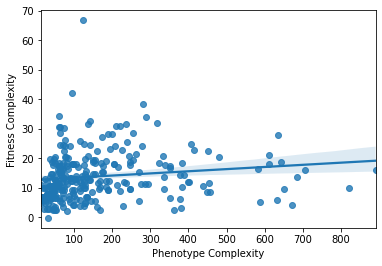

In [6]:
tp.tee(
    sns.regplot,
    data=df,
    x='Phenotype Complexity',
    y='Fitness Complexity',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)


teeplots/bucket=prq49+endeavor=16.0~nan+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fitness-complexity+_dfdigest=-27a847b886ecc760+ext=.pdf
teeplots/bucket=prq49+endeavor=16.0~nan+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fitness-complexity+_dfdigest=-27a847b886ecc760+ext=.png


(0.3612851185807262, 0.023836736030209388)

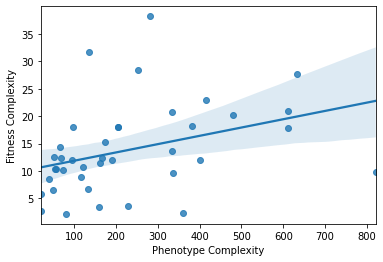

In [7]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Phenotype Complexity',
    y='Fitness Complexity',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

fil = df40.dropna(
    subset=[
        'Phenotype Complexity',
        'Fitness Complexity',
    ],
)
stats.pearsonr(
    fil['Phenotype Complexity'],
    fil['Fitness Complexity'],
)

teeplots/bucket=prq49+endeavor=16.0~nan+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fitness-complexity+_dfdigest=-27a847b886ecc760+ext=.pdf
teeplots/bucket=prq49+endeavor=16.0~nan+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fitness-complexity+_dfdigest=-27a847b886ecc760+ext=.png


(0.0969267242310776, 0.5518546295025447)

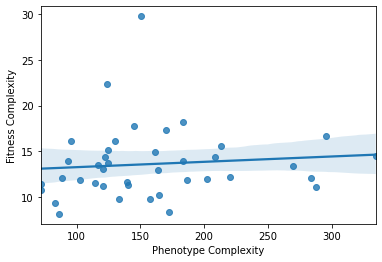

In [8]:
tp.tee(
    sns.regplot,
    data=df.groupby('Series').mean(),
    x='Phenotype Complexity',
    y='Fitness Complexity',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df.groupby('Series')['Phenotype Complexity'].mean(),
    df.groupby('Series')['Fitness Complexity'].mean(),
)